In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 ## 1. Process mood data

In [71]:
#response_data = pd.read_excel("Survey-curated-peng.xlsx", sheet_name = "Response data",index_col = 0)
response = pd.read_excel("Survey-Curated-delete-bottom-bin.xlsx", sheet_name = "Response data")

In [72]:
mood_df = response.drop(columns=["Day_track","Total Steps", "Active Seconds", "Highly Active Seconds"], axis=1)

In [73]:
mood_df.shape

(527, 44)

## Need to covert object of "Date" to datetime

In [47]:
mood_df["Date"] = pd.to_datetime(mood_df["Date"],errors='coerce')

In [48]:
""" 
1. Generate an integer-represented weekday column from the column of date to day_track columns
2. Delete the sparse columns of Total steps, Active Seconds, and Highly Active Seconds
Keep in mind: that Monday = 0, Sunday=6 in pandas dt weekday_name
"""
# convert datetime format into numberical weekday
mood_df['Date'] = mood_df["Date"].dt.weekday
# rename the column of Date as Weekday
mood_df = mood_df.rename(columns={'Date': "Weekday"})
#mood_df.head()

In [49]:
"""
Take a look at the processed data one more time.
find many columns have the max value as 99 which means missing, therefore replace 99 with NaN
"""
mood_df = mood_df.replace(99, np.NaN)

In [50]:
mood_df.isnull().mean().sort_values(ascending=False)

Breakfast_Snacks                    1.000000
Additional_Red Meat Protein         0.984820
Lunch_Caffeinated Beverages         0.960152
Dinner_Caffeinated Beverages        0.952562
Breakfast_Vegetables                0.939279
Breakfast_Caffeinated Beverages     0.937381
Additional_Other Protein            0.935484
Dinner_Fruits                       0.929791
Breakfast_Red Meat Protein          0.908918
Additional_Caffeinated Beverages    0.899431
Additional_Vegetables               0.888046
Additional_Fruits                   0.876660
Additional_Dairy                    0.851992
Lunch_Red Meat Protein              0.842505
Dinner_Snacks                       0.834915
Breakfast_Fruits                    0.802657
Lunch_Fruits                        0.798861
Breakfast_Other Protein             0.783681
Breakfast_Dairy                     0.768501
Lunch_Snacks                        0.738140
Dinner_Red Meat Protein             0.721063
Lunch_Dairy                         0.705882
Dinner_Dai

In [51]:
"""
drop columns of Breakfast_Snacks, all Beverages features, 
and those contains missing values more than 90% because they are not using for training;

"""

mood_df = mood_df.dropna(thresh=len(mood_df)*0.11, axis='columns')
print(mood_df.shape)

(527, 34)


In [52]:
mood_df.columns

Index(['Internal Study ID', 'Weekday', 'Morning_mood', 'Afternoon_mood',
       'Evening_mood', 'Breakfast_time', 'Lunch_time', 'Dinner_time',
       'Water_oz', 'Feeling of slept', 'Trouble in falling sleep',
       'Trouble in staying asleep', 'Breakfast_Fruits', 'Breakfast_Grains',
       'Breakfast_Other Protein', 'Breakfast_Dairy', 'Lunch_Fruits',
       'Lunch_Vegetables', 'Lunch_Grains', 'Lunch_Red Meat Protein',
       'Lunch_Other Protein', 'Lunch_Dairy', 'Lunch_Snacks',
       'Dinner_Vegetables', 'Dinner_Grains', 'Dinner_Red Meat Protein',
       'Dinner_Other Protein', 'Dinner_Dairy', 'Dinner_Snacks',
       'Additional_Fruits', 'Additional_Vegetables', 'Additional_Grains',
       'Additional_Dairy', 'Additional_Snacks'],
      dtype='object')

In [53]:
mood_df.isnull().mean().sort_values(ascending=False)

Additional_Vegetables        0.888046
Additional_Fruits            0.876660
Additional_Dairy             0.851992
Lunch_Red Meat Protein       0.842505
Dinner_Snacks                0.834915
Breakfast_Fruits             0.802657
Lunch_Fruits                 0.798861
Breakfast_Other Protein      0.783681
Breakfast_Dairy              0.768501
Lunch_Snacks                 0.738140
Dinner_Red Meat Protein      0.721063
Lunch_Dairy                  0.705882
Dinner_Dairy                 0.666034
Lunch_Other Protein          0.618596
Dinner_Other Protein         0.611006
Lunch_Vegetables             0.571157
Additional_Grains            0.555977
Additional_Snacks            0.495256
Dinner_Vegetables            0.444023
Lunch_Grains                 0.383302
Dinner_Grains                0.339658
Breakfast_Grains             0.320683
Water_oz                     0.053131
Trouble in staying asleep    0.047438
Trouble in falling sleep     0.047438
Feeling of slept             0.047438
Dinner_time 

### Fill NaN with either 0 or mode

In [54]:
"""
Fill NaN as 0 for the columns of food types, because these 0 are meaningful

"""

name_food = ['Breakfast_Fruits', 'Breakfast_Grains',
       'Breakfast_Other Protein', 'Breakfast_Dairy', 'Lunch_Fruits',
       'Lunch_Vegetables', 'Lunch_Grains', 'Lunch_Red Meat Protein',
       'Lunch_Other Protein', 'Lunch_Dairy', 'Lunch_Snacks',
       'Dinner_Vegetables', 'Dinner_Grains', 'Dinner_Red Meat Protein',
       'Dinner_Other Protein', 'Dinner_Dairy', 'Dinner_Snacks',
       'Additional_Fruits', 'Additional_Vegetables', 'Additional_Grains',
       'Additional_Dairy', 'Additional_Snacks']

for name in name_food:
    value = mood_df[name].fillna(0)
    mood_df.loc[:, name] = value

In [55]:
mood_df.isnull().mean().sort_values(ascending=False)[:10]

Water_oz                     0.053131
Dinner_time                  0.047438
Feeling of slept             0.047438
Trouble in falling sleep     0.047438
Trouble in staying asleep    0.047438
Evening_mood                 0.026565
Afternoon_mood               0.022770
Lunch_time                   0.020873
Morning_mood                 0.013283
Breakfast_time               0.011385
dtype: float64

In [56]:
"""
Fill NaN use its mode values for the other columns
"""

# replace NaN with mode
name_others = ['Weekday','Morning_mood', 'Afternoon_mood',
       'Evening_mood', 'Breakfast_time', 'Lunch_time', 'Dinner_time',
       'Water_oz', 'Feeling of slept', 'Trouble in falling sleep',
       'Trouble in staying asleep']
    
for name in name_others:
    fill_value = mood_df[name].mode()[0]
    mood_df.loc[:, name] = mood_df.loc[:, name].fillna(fill_value)

In [57]:
mood_df.isnull().mean().sort_values(ascending=False)[:10]

Additional_Snacks            0.0
Water_oz                     0.0
Breakfast_Other Protein      0.0
Breakfast_Grains             0.0
Breakfast_Fruits             0.0
Trouble in staying asleep    0.0
Trouble in falling sleep     0.0
Feeling of slept             0.0
Dinner_time                  0.0
Additional_Dairy             0.0
dtype: float64

### Convert float to integer for the sake of convertion to categorical using OneHotEncoder
This need to be done after fill nan because python cannot convert NA or inf to integer

In [58]:
"""
Convert all numberic columns into integer
(this need to be done after fill NaN
becasue paython cannot convert non-finite values (NA or inf) to integer)

"""
mood_df = mood_df.astype('int64')

In [59]:
#mood_df3.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a609278>,
      dtype=object)

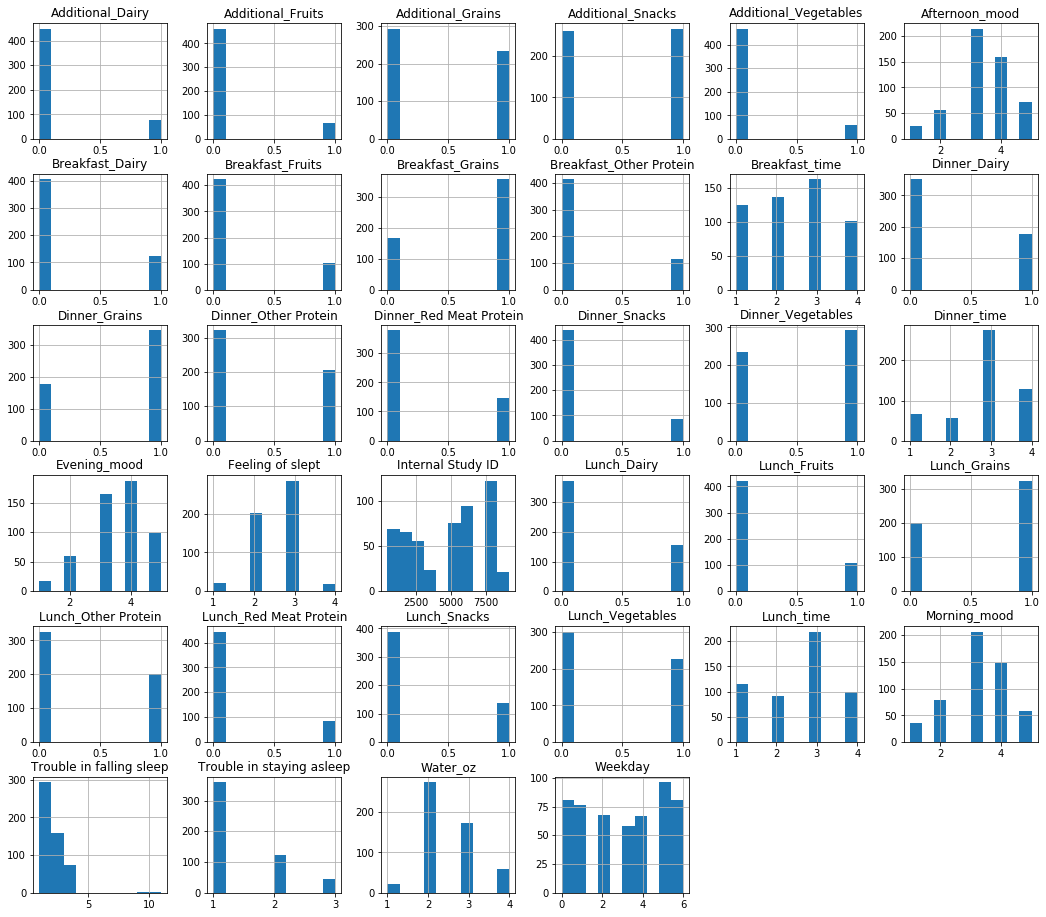

In [60]:
mood_df.hist(figsize=(18,16))

In [61]:
#import pandas_profiling
#profile = pandas_profiling.ProfileReport(mood_df3)
#profile.to_file(output_file="TCM_mood.html")

### Export the data as "mood_cleaned.csv"

moo_cleaned.csv:   drop some columns, fill na with 0 or mode

In [62]:
mood_df.to_csv("mood_cleaned.csv", header=True, index=None)

### Add the column: next_morning_mood and export it as "next_morning_mood.csv"

In [63]:
mood_df_indexed=mood_df.set_index('Internal Study ID')

In [64]:
# there are 25 unique students

#student_id = mood_df2['Internal Study ID'].unique()
next_morning_mood =[]
student_id = mood_df_indexed.index.unique().values
print('student_id', student_id)
for i in student_id:
    mood = mood_df_indexed.loc[i, 'Morning_mood'].values
    individual_mood = [np.median(mood)]* len(mood)
    for j in range(len(mood)):
        individual_mood[j] = mood[j-1]
        #print(individual_mood[j], end=' ')
    next_morning_mood = next_morning_mood + individual_mood
print('next_morning_mood', next_morning_mood)

student_id [ 511 7886 1682 5195 5458 9122 5936 1400 5049 2786 3062  613 7548 6117
 1644 4944 7631 6292 7774 1270 3423 1127 7887 5912 9095]
next_morning_mood [4, 4, 3, 3, 4, 3, 3, 5, 5, 4, 4, 4, 3, 3, 3, 3, 4, 4, 5, 3, 3, 3, 4, 4, 4, 4, 5, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 2, 1, 3, 5, 5, 5, 5, 5, 2, 2, 4, 3, 3, 2, 1, 3, 2, 2, 2, 3, 2, 1, 1, 1, 1, 3, 4, 4, 2, 2, 2, 4, 4, 4, 4, 1, 5, 1, 3, 3, 2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 5, 2, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 4, 4, 3, 3, 3, 3, 2, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 4, 4, 4, 3, 4, 1, 3, 3, 2, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 4, 3, 4, 4, 4, 4, 5, 4, 5, 4, 3, 3, 3, 4, 3, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 5, 3, 2, 3, 1, 2, 4, 3, 3, 3, 5, 2, 2, 2, 4, 5, 2, 4, 2, 2, 3, 3, 4, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 4, 3, 4, 3, 4, 4, 3,

In [65]:
"""
add the new column of next_morning_mood into the original mood_df3 dataframe
"""

mood_df['Next_morning_mood'] = next_morning_mood

In [66]:
mood_df.head()

,Internal Study ID,Weekday,Morning_mood,Afternoon_mood,Evening_mood,Breakfast_time,Lunch_time,Dinner_time,Water_oz,Feeling of slept,...,Dinner_Red Meat Protein,Dinner_Other Protein,Dinner_Dairy,Dinner_Snacks,Additional_Fruits,Additional_Vegetables,Additional_Grains,Additional_Dairy,Additional_Snacks,Next_morning_mood
0,511,5,4,5,3,2,3,4,2,2,...,1,0,0,0,0,0,1,0,1,4
1,511,6,3,3,3,3,3,3,3,3,...,1,0,0,0,0,0,1,0,1,4
2,511,0,3,3,4,2,3,2,3,2,...,0,1,0,0,0,0,1,0,1,3
3,511,1,4,3,3,2,3,3,3,2,...,1,0,0,0,0,0,1,0,1,3
4,511,2,3,4,3,2,3,3,3,2,...,0,0,1,0,0,0,1,0,1,4


### Save the file as "next_morning_mood_csv"

In [67]:
mood_df.to_csv('next_morning_mood.csv', header=True, index=None)

## The following code has not exerted yet

response_unique_stud = response_data.groupby("Internal Study ID") \
  .apply(lambda x: pd.Series({
      "Morning_mean_mood"       : x['Morning_mood'].median(),
      'Morning_best_mood'       : x['Morning_mood'].max(),
      'Morning_worse_mood'      : x['Morning_mood'].min(),
    'Water_oz'      : x['Water_oz'].median(),
    'Feeling of slept'      : x['Feeling of slept'].median(),
    'Trouble in falling sleep'      : x['Trouble in falling sleep'].median(),
    'Trouble in staying asleep'      : x['Trouble in staying asleep'].median(),
    'Feeling of slept'      : x['Feeling of slept'].median(),
    'Total Steps'      : x['Total Steps'].mean(),
    'Active Seconds'      : x['Active Seconds'].mean(),
    'Highly Active Seconds'      : x['Highly Active Seconds'].mean(),
    'Breakfast_Fruits'      : x['Breakfast_Fruits'].median(),
    'Breakfast_Vegetables'      : x['Breakfast_Vegetables'].median(),
    'Breakfast_Grains'      : x['Breakfast_Grains'].mean(),
    'Breakfast_Red Meat Protein'      : x['Breakfast_Red Meat Protein'].median(),
    'Breakfast_Dairy'      : x['Breakfast_Dairy'].median(),
    'Breakfast_Caffeinated Beverages'      : x['Breakfast_Caffeinated Beverages'].median(),
    'Breakfast_Snacks'      : x['Breakfast_Snacks'].median()
  })
)

## 2. Process the sociodemographics data

In [74]:
social_demographics = pd.read_excel("Survey-Curated-delete-bottom-bin.xlsx", sheet_name = "Sociodemographics")
# social_demographics = social_demographics.drop(columns="Bin"), I already delete "bin" in this excel file
social_demographics = social_demographics.replace(99, np.NaN)

In [69]:
### Drop the three columns of which more than half rows have missing values
### There is a typo in the feature names: Ethnicity vs Ethinity
### Drop the study ID = 7877, most features of which are missing
### Drop the feature of Age, because there is only one category for all the rows
social_demographics = social_demographics.drop(columns = ['recreational hours', 'church hours', 'work hours'])
social_demographics = social_demographics[social_demographics.index != 7887]
social_demographics = social_demographics.drop(columns = "Age")
social_demographics = social_demographics.rename(columns={"Ethinity": "Ethnicity"})
# calculate the most frequence one
mode = social_demographics['Race'].mode()
mode[0]
# replace NaN with mode
for name in social_demographics.columns:
    most_common = social_demographics[name].mode()[0]
    social_demographics[name] = social_demographics[name].fillna(most_common)
social_demographics.to_csv("base_cleaned.csv", header=True, index=None)
social_demographics = social_demographics.astype('int64')
social_demographics.to_csv("base_integer.csv", header=True, index=None)

### Combined two sets and save as combined and sorted

In [70]:
base = pd.read_csv("base_integer.csv")
print(base.shape)
mood = pd.read_csv("next_morning_mood.csv")
print(mood.shape)
combined = pd.merge(base, mood, on='Internal Study ID')
combined = combined.sort_values(by = "Internal Study ID")
print(combined.shape)
combined.to_csv("combined.csv", index=None)

(28, 15)
(527, 35)
(527, 49)
